In [1]:
import mmcv
import numpy as np
from PIL import Image, ImageFilter
import skimage.morphology
from scipy import ndimage
import random
from skimage import color,filters,io
from sklearn.preprocessing import normalize
import io
from scipy.interpolate import UnivariateSpline
import PIL
from scipy import interpolate
import skimage
import cv2
import os
from x_distortion import add_distortion, multi_distortions_dict, distortions_dict

In [2]:
img = cv2.cvtColor(mmcv.imread('/root/autodl-tmp/example/kadis_HR/koala-185736.png'), cv2.COLOR_BGR2RGB)

In [9]:
img1=add_distortion(img=img, severity=4, distortion_name='noise_impulse')
# img2=add_distortion(img=img1, severity=4, distortion_name='contrast_weaken_scale')
# img=add_distortion(img=img, severity=4, distortion_name='quantization_hist') # 最多和第一个一样
# img=add_distortion(img=img, severity=2, distortion_name='compression_jpeg') # 最多比第一个大1
# img=add_distortion(img=img, severity=1,2, distortion_name='blur_gaussian') # 第二个时只能是1,2
# blur_gaussian contrast_weaken_scale 先后顺序结果一样

In [ ]:
Image.fromarray(img1)

In [2]:
import json
import numpy as np
import cv2
import pycocotools.mask as maskUtils
import os

In [22]:
with open('/Users/helenpeng/Desktop/img_in/7345.json', 'r') as f:
    output = json.load(f)
height, width = output['imageHeight'], output['imageWidth']
# caption = output['image_text']
name = output['imagePath'].split('.')[0]
# 同一个mask分离成2块的就当做两个mask
json_file={'annotations':[]}
label_list=[]
i=output['shapes'][0]
every_json_file={}
poly = i['points']
mask=poly2mask(poly,height,width)
all=np.argwhere(mask != 0)
x_1=np.min(all[:, 0]).item()
y_1=np.min(all[:, 1]).item()
x_2=np.max(all[:, 0]).item()
y_2=np.max(all[:, 1]).item()
bbox=[y_1,x_1,y_2,x_2]
rle=singleMask2rle(mask)
class_name, distortion = i['label'].split(';')[0],i['label'].split(';')[1:]
every_json_file['segmentation']=rle
every_json_file['area']=len(all)
every_json_file['bbox']=bbox
every_json_file['class_name']=class_name
every_json_file['distortion']=distortion
json_file['annotations'].append(every_json_file)

In [23]:
with open('/Users/helenpeng/Desktop/img_in/7345.json', 'r') as f:
    output = json.load(f)
height, width = output['imageHeight'], output['imageWidth']
# caption = output['image_text']
name = output['imagePath'].split('.')[0]
# 同一个mask分离成2块的就当做两个mask
json_file={'annotations':[]}
label_list=[]
i=output['shapes'][1]
every_json_file1={}
poly = i['points']
mask=poly2mask(poly,height,width)
all=np.argwhere(mask != 0)
x_1=np.min(all[:, 0]).item()
y_1=np.min(all[:, 1]).item()
x_2=np.max(all[:, 0]).item()
y_2=np.max(all[:, 1]).item()
bbox=[y_1,x_1,y_2,x_2]
rle=singleMask2rle(mask)
class_name, distortion = i['label'].split(';')[0],i['label'].split(';')[1:]
every_json_file1['segmentation']=rle
every_json_file1['area']=len(all)
every_json_file1['bbox']=bbox
every_json_file1['class_name']=class_name
every_json_file1['distortion']=distortion

In [24]:
with open('/Users/helenpeng/Desktop/img_in/7345.json', 'r') as f:
    output = json.load(f)
height, width = output['imageHeight'], output['imageWidth']
# caption = output['image_text']
name = output['imagePath'].split('.')[0]
# 同一个mask分离成2块的就当做两个mask
json_file={'annotations':[]}
label_list=[]
i=output['shapes'][2]
every_json_file2={}
poly = i['points']
mask=poly2mask(poly,height,width)
all=np.argwhere(mask != 0)
x_1=np.min(all[:, 0]).item()
y_1=np.min(all[:, 1]).item()
x_2=np.max(all[:, 0]).item()
y_2=np.max(all[:, 1]).item()
bbox=[y_1,x_1,y_2,x_2]
rle=singleMask2rle(mask)
class_name, distortion = i['label'].split(';')[0],i['label'].split(';')[1:]
every_json_file2['segmentation']=rle
every_json_file2['area']=len(all)
every_json_file2['bbox']=bbox
every_json_file2['class_name']=class_name
every_json_file2['distortion']=distortion

In [29]:
with open('/Users/helenpeng/Desktop/img_in/7345.json', 'r') as f:
    output = json.load(f)
height, width = output['imageHeight'], output['imageWidth']
# caption = output['image_text']
name = output['imagePath'].split('.')[0]
# 同一个mask分离成2块的就当做两个mask
json_file={'annotations':[]}
label_list=[]
i=output['shapes'][3]
every_json_file3={}
poly = i['points']
mask=poly2mask(poly,height,width)
all=np.argwhere(mask != 0)
x_1=np.min(all[:, 0]).item()
y_1=np.min(all[:, 1]).item()
x_2=np.max(all[:, 0]).item()
y_2=np.max(all[:, 1]).item()
bbox=[y_1,x_1,y_2,x_2]
rle=singleMask2rle(mask)
class_name, distortion = i['label'].split(';')[0],i['label'].split(';')[1:]
every_json_file3['segmentation']=rle
every_json_file3['area']=len(all)
every_json_file3['bbox']=bbox
every_json_file3['class_name']=class_name
every_json_file3['distortion']=distortion

In [31]:
im=Image.fromarray(all_mask*225)

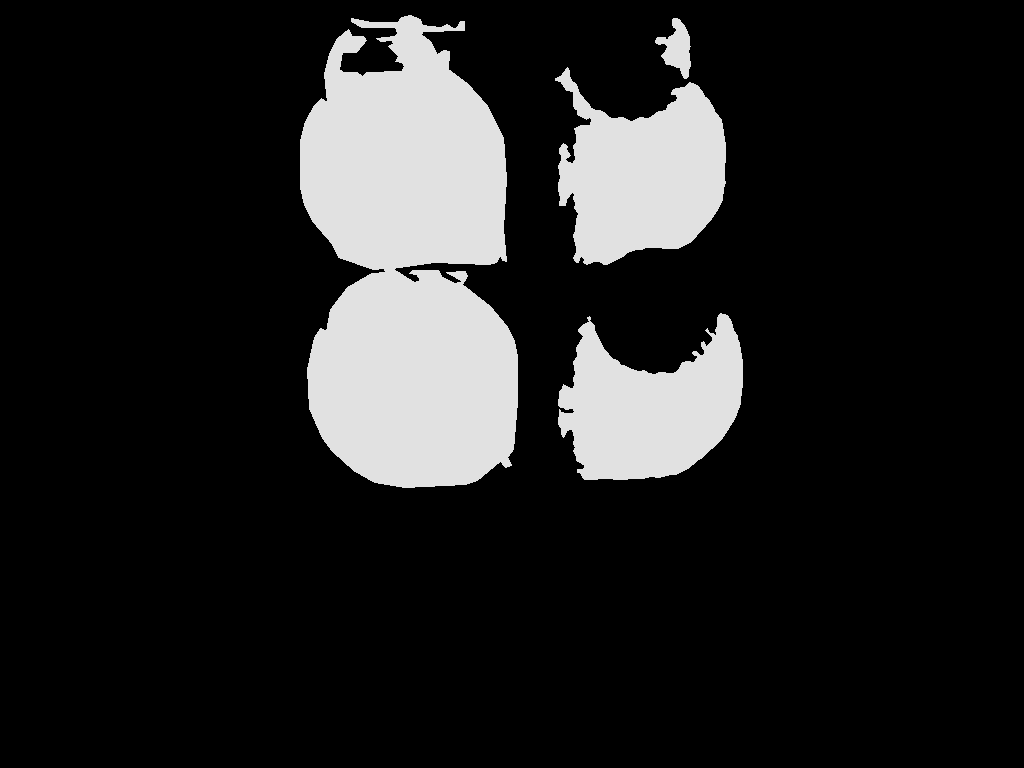

In [32]:
im

In [30]:
all_mask=maskUtils.decode(every_json_file['segmentation'])+maskUtils.decode(every_json_file1['segmentation'])+maskUtils.decode(every_json_file2['segmentation'])+maskUtils.decode(every_json_file3['segmentation'])

In [39]:
all=np.argwhere(all_mask != 0)
x_1=np.min(all[:, 0]).item()
y_1=np.min(all[:, 1]).item()
x_2=np.max(all[:, 0]).item()
y_2=np.max(all[:, 1]).item()

In [40]:
[y_1,x_1,y_2,x_2]

[800, 467, 1022, 765]

In [3]:
def poly2mask(points, height, width):
    mask = np.zeros((height, width), dtype=np.int32)
    obj = np.array([points], dtype=np.int32)
    cv2.fillPoly(mask, obj, 1)
    return mask


def singleMask2rle(mask):
    rle = maskUtils.encode(np.array(mask[:, :, None], order='F', dtype="uint8"))[0]
    rle["counts"] = rle["counts"].decode("utf-8")
    return rle